In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [152]:
%%bash
cat BYxRM_simplified.vcf | grep -v "^#" | wc

   16624 17704560 109080109


### PCA

In [3]:
pca_output = pd.read_csv('plink.eigenvec', sep = ' ', header=None)
pca_output

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,A01,1,0.035345,0.012119,0.020363,0.036976,-0.003718,0.038301,0.028045,-0.007186,...,-0.009988,-0.009840,-0.000947,0.016358,0.018966,0.044993,0.018772,0.025147,-0.038774,0.014238
1,A01,2,-0.020373,-0.011530,-0.008718,-0.070399,-0.050629,0.045062,-0.069903,-0.014343,...,0.014122,0.003327,-0.003976,-0.020887,-0.032663,-0.017242,0.015991,-0.007908,0.008725,0.013989
2,A01,3,-0.017266,-0.008064,-0.052266,-0.038847,-0.038261,0.028245,0.046283,0.008466,...,0.015052,-0.002439,-0.048750,0.047930,-0.032183,0.004607,-0.016738,0.003439,-0.063794,-0.034954
3,A01,4,0.020792,-0.074473,-0.007450,0.007979,0.013607,0.022670,-0.024619,0.035339,...,0.000669,-0.005593,0.006858,0.025626,0.012285,0.057778,0.021666,-0.041886,0.001938,-0.043775
4,A01,5,-0.031918,0.068591,0.025089,-0.008338,0.016420,0.010175,0.009659,-0.051205,...,-0.006765,-0.012257,0.014609,-0.034157,-0.011838,0.025975,0.009821,0.030508,-0.011105,0.034869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,A11,92,0.028258,0.029521,0.073246,0.007986,-0.023496,0.002155,-0.015471,-0.016469,...,-0.034350,-0.016404,-0.033016,0.025895,0.022025,0.021827,-0.000942,-0.013724,0.036798,0.037410
947,A11,93,-0.013469,-0.003927,-0.047575,-0.030728,-0.045670,0.016102,-0.035031,-0.048079,...,-0.007580,-0.020664,-0.011800,0.022192,0.014543,0.014683,-0.002665,-0.009335,0.020004,0.001750
948,A11,94,-0.000906,0.063399,0.005936,-0.000015,0.007514,-0.045466,0.020304,-0.008391,...,0.082074,0.032907,-0.035074,0.058970,0.040479,-0.038558,0.029731,-0.057467,-0.015875,-0.017111
949,A11,95,-0.002879,0.053984,0.013385,-0.003550,0.038551,-0.045108,0.005051,0.003467,...,0.010656,-0.029883,-0.024035,0.025607,-0.015668,0.012360,0.011888,0.017862,0.030352,0.055357


In [4]:
pca_output_df = pd.DataFrame(data = pca_output, columns = [2,3,4,5,6,7,8,9,10,11])
pca_output_df

,2,3,4,5,6,7,8,9,10,11
0,0.035345,0.012119,0.020363,0.036976,-0.003718,0.038301,0.028045,-0.007186,0.055228,0.000043
1,-0.020373,-0.011530,-0.008718,-0.070399,-0.050629,0.045062,-0.069903,-0.014343,0.023849,0.027004
2,-0.017266,-0.008064,-0.052266,-0.038847,-0.038261,0.028245,0.046283,0.008466,0.003142,-0.030971
3,0.020792,-0.074473,-0.007450,0.007979,0.013607,0.022670,-0.024619,0.035339,-0.032396,-0.018840
4,-0.031918,0.068591,0.025089,-0.008338,0.016420,0.010175,0.009659,-0.051205,-0.032381,0.030435
...,...,...,...,...,...,...,...,...,...,...
946,0.028258,0.029521,0.073246,0.007986,-0.023496,0.002155,-0.015471,-0.016469,-0.076934,-0.000476
947,-0.013469,-0.003927,-0.047575,-0.030728,-0.045670,0.016102,-0.035031,-0.048079,0.004384,0.005708
948,-0.000906,0.063399,0.005936,-0.000015,0.007514,-0.045466,0.020304,-0.008391,-0.007063,-0.043508
949,-0.002879,0.053984,0.013385,-0.003550,0.038551,-0.045108,0.005051,0.003467,-0.009923,-0.013165


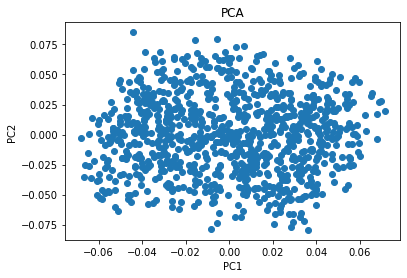

In [5]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df[2], y = pca_output_df[3])
ax.set_title('PCA')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

### Allele Frequency

In [6]:
allele_freq = pd.read_csv('plink.frq',delim_whitespace=True)
allele_freq

,CHR,SNP,A1,A2,MAF,NCHROBS
0,23,s10-24532,G,A,0.4855,1798
1,23,s10-24640,T,C,0.4758,1738
2,23,s10-24647,T,A,0.4721,1722
3,23,s10-25720,C,T,0.4840,1880
4,23,s10-25877,G,T,0.4841,1888
...,...,...,...,...,...,...
16619,XVI,s16-942569,C,G,0.4599,1894
16620,XVI,s16-942576,G,T,0.4974,1898
16621,XVI,s16-942585,G,A,0.4821,1898
16622,XVI,.,T,C,0.3877,1870


In [7]:
allele_freq_df = pd.DataFrame(data = allele_freq)
allele_freq_df

,CHR,SNP,A1,A2,MAF,NCHROBS
0,23,s10-24532,G,A,0.4855,1798
1,23,s10-24640,T,C,0.4758,1738
2,23,s10-24647,T,A,0.4721,1722
3,23,s10-25720,C,T,0.4840,1880
4,23,s10-25877,G,T,0.4841,1888
...,...,...,...,...,...,...
16619,XVI,s16-942569,C,G,0.4599,1894
16620,XVI,s16-942576,G,T,0.4974,1898
16621,XVI,s16-942585,G,A,0.4821,1898
16622,XVI,.,T,C,0.3877,1870


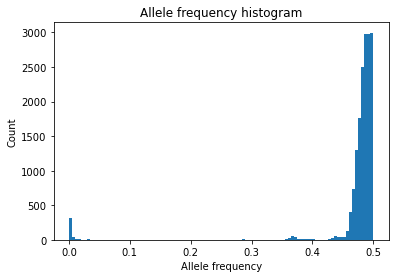

In [8]:
fig, ax = plt.subplots()
ax.hist(allele_freq_df['MAF'],bins=100)
ax.set_title('Allele frequency histogram')
ax.set_xlabel('Allele frequency')
ax.set_ylabel('Count')
plt.show()

In [9]:
# Read in phenotype txt file
phenotype = pd.read_csv('BYxRM_PhenoData.txt',sep='\t')

In [10]:
# Convert to dataframe
phenotype_df = pd.DataFrame(phenotype)

In [11]:
# Rename first column to 'ID'
phenotype_df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

In [12]:
# Split ID column on _ and add new columns FID and IID
phenotype_df[['FID','IID']] = phenotype_df.ID.str.split("_",expand=True)

In [13]:
# Move new columns to beginning of DF
cols_to_move = ['FID', 'IID']
phenotype_df = phenotype_df[cols_to_move + [col for col in phenotype_df.columns if col not in cols_to_move]]

In [14]:
# Remove ID column
del phenotype_df['ID']

In [15]:
# Convert phenotype_df to txt file
phenotype_df.to_csv(r'phenotypes.txt',sep='\t',index=None, na_rep='NA')

## Manhattan Plots

In [4]:
#split columns on any number of spaces 
gwas_cad_chlor = pd.read_csv("plink.Cadmium_Chloride.assoc.linear", sep="\s+")
gwas_cad_chlor['logP'] = -1 * np.log10(gwas_cad_chlor['P'])
gwas_cad_chlor['snp_index'] = range(len(gwas_cad_chlor))
gwas_cad_chlor

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
0,I,.,1074,C,ADD,676,-0.5976,-1.62200,0.10540,0.977159,0
1,I,.,1074,C,COV1,676,10.2300,1.40100,0.16160,0.791559,1
2,I,.,1074,C,COV2,676,6.8520,0.95190,0.34150,0.466609,2
3,I,.,1074,C,COV3,676,-8.6080,-1.15900,0.24680,0.607655,3
4,I,.,1074,C,COV4,676,-9.3770,-1.26300,0.20710,0.683820,4
...,...,...,...,...,...,...,...,...,...,...,...
182859,XVI,s16-942822,942826,G,COV6,675,18.5200,2.49300,0.01291,1.889074,182859
182860,XVI,s16-942822,942826,G,COV7,675,-8.4760,-1.11900,0.26350,0.579219,182860
182861,XVI,s16-942822,942826,G,COV8,675,-10.7900,-1.44300,0.14960,0.825068,182861
182862,XVI,s16-942822,942826,G,COV9,675,4.7350,0.63920,0.52290,0.281581,182862


In [5]:
sig_cad_chlor = gwas_cad_chlor.query('P < 10e-5')
sig_cad_chlor

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
17677,II,s02-721083,721088,T,ADD,713,1.168,4.690,3.291000e-06,5.482672,17677
17688,II,s02-722164,722169,A,ADD,706,1.200,4.807,1.878000e-06,5.726304,17688
17699,II,s02-722584,722589,T,ADD,702,1.341,5.376,1.043000e-07,6.981716,17699
17710,II,s02-723170,723175,C,ADD,721,1.326,5.377,1.030000e-07,6.987163,17710
17721,II,s02-723276,723281,A,ADD,717,1.281,5.184,2.839000e-07,6.546835,17721
...,...,...,...,...,...,...,...,...,...,...,...
76676,VII,s07-935003,935000,A,COV6,722,36.560,3.917,9.844000e-05,4.006828,76676
79332,VII,.,1081450,GG,ADD,711,-1.838,-6.666,5.323000e-11,10.273844,79332
143495,XIV,.,6912,GTC,ADD,722,-1.826,-4.140,3.885000e-05,4.410609,143495
143506,XIV,s14-6924,6924,G,ADD,722,-2.991,-7.699,4.603000e-14,13.336959,143506


In [6]:
cad_chlor_sorted = gwas_cad_chlor.sort_values(by = "P")
cad_chlor_sorted['uniform_points'] = range(0, len(cad_chlor_sorted))
cad_chlor_sorted['uniform_pval'] = (cad_chlor_sorted['uniform_points'] + 1) / len(cad_chlor_sorted)
cad_chlor_sorted['uniform_logP'] = -1 * np.log10(cad_chlor_sorted['uniform_pval'])
cad_chlor_sorted

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index,uniform_points,uniform_pval,uniform_logP
18447,II,s02-795750,795756,C,ADD,706,-5.762,-58.53,1.300000e-270,269.886057,18447,0,0.000005,5.262128
18458,II,s02-798776,798782,A,ADD,713,-5.621,-52.27,4.736000e-244,243.324588,18458,1,0.000011,4.961098
18469,II,s02-799311,799317,A,ADD,707,-5.574,-50.16,3.872000e-233,232.412065,18469,2,0.000016,4.785007
18480,II,s02-799985,799991,G,ADD,712,-5.567,-49.79,3.325000e-232,231.478208,18480,3,0.000022,4.660068
18513,II,s02-800740,800746,C,ADD,720,5.521,49.16,1.957000e-230,229.708409,18513,4,0.000027,4.563158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182089,XVI,s16-890342,890346,T,COV6,673,NaN,NaN,NaN,NaN,182089,182859,0.999978,0.000009
182090,XVI,s16-890342,890346,T,COV7,673,NaN,NaN,NaN,NaN,182090,182860,0.999984,0.000007
182091,XVI,s16-890342,890346,T,COV8,673,NaN,NaN,NaN,NaN,182091,182861,0.999989,0.000005
182092,XVI,s16-890342,890346,T,COV9,673,NaN,NaN,NaN,NaN,182092,182862,0.999995,0.000002


In [8]:
# make a list of all the chromosomes for plotting
# 23 is chromosome X, PLINK changed it
# 26 is chromosome M, again a default change
chr_list = ["I","II","III","IV","V","VI","VII","VIII","IX","23","XI",
           "XII","XIII","XIV","XV","XVI","26"]

#### We can see that the top SNP is s02-795750 from the sorted data

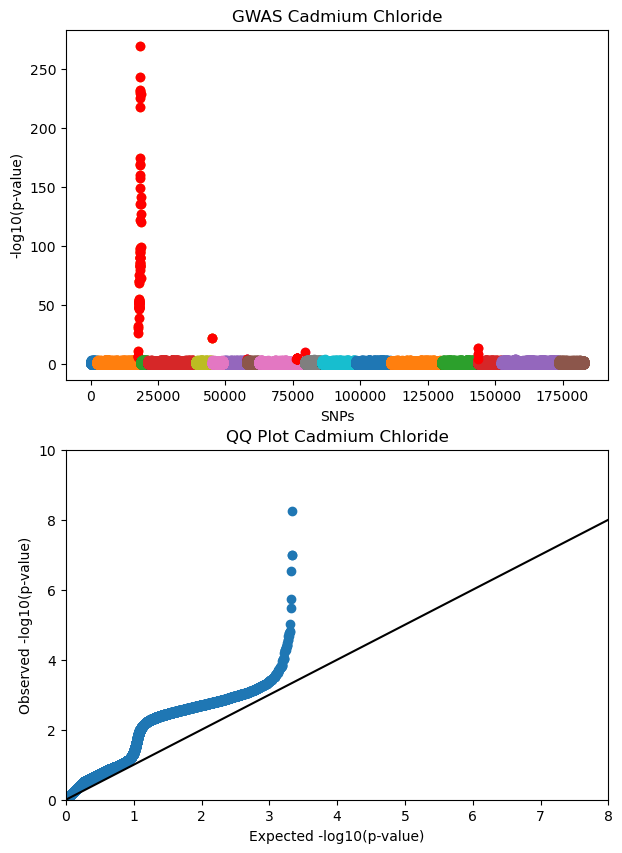

In [10]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(nrows=2, figsize=(7,10))
plt.style.use('default')

for i in chr_list:
    ax[0].scatter(gwas_cad_chlor["snp_index"][gwas_cad_chlor["CHR"]==i],
                 gwas_cad_chlor["logP"][gwas_cad_chlor["CHR"]==i])
    ax[0].scatter(sig_cad_chlor["snp_index"][sig_cad_chlor["CHR"]==i],
                 sig_cad_chlor["logP"][sig_cad_chlor["CHR"]==i],
                 color = 'red')

ax[0].set_xlabel("SNPs")
ax[0].set_ylabel("-log10(p-value)")
ax[0].set_title("GWAS Cadmium Chloride")

ax[1].scatter(cad_chlor_sorted["uniform_logP"], cad_chlor_sorted["logP"])
ax[1].plot([8,0],[8,0],color="black")
ax[1].set_xlim([0,8])
ax[1].set_ylim([0,10])
ax[1].set_xlabel("Expected -log10(p-value)")
ax[1].set_ylabel("Observed -log10(p-value)")
ax[1].set_title("QQ Plot Cadmium Chloride")

plt.show()

### Top SNP from Cadmium Chloride

We saw from the sorted dataframe that the top (most significant) SNP is s02-795750 on CHR II. Either use PLINK to pull this data, or parse through vcf to get it.

In [12]:
import pandas as pd
import numpy as np

In [13]:
# read in phenotype file

phenotype = pd.read_csv('phenotypes.txt', sep = '\t')
phenotype['subject_id'] = phenotype['FID'].astype(str)+ "_" + phenotype['IID'].astype(str)
phenotype

,FID,IID,Cadmium_Chloride,Caffeine,Calcium_Chloride,Cisplatin,Cobalt_Chloride,Congo_red,Copper,Cycloheximide,...,Xylose,YNB,YNB:ph3,YNB:ph8,YPD,YPD:15C,YPD:37C,YPD:4C,Zeocin,subject_id
0,A01,1,-7.323520,0.279993,0.313118,1.658179,-1.604442,5.841617,-4.130950,0.821226,...,-0.309149,17.470822,0.055225,-0.184268,24.548971,0.712171,0.890842,4.118372,8.592818,A01_1
1,A01,2,-8.098236,-0.206326,-0.534844,-0.918012,0.892198,-1.618172,1.131947,-0.764736,...,0.697908,18.052925,0.283462,1.662201,26.808476,-1.522498,0.006062,0.066515,-4.220476,A01_2
2,A01,3,7.605720,-0.127960,-0.311102,-2.712088,3.301709,-6.680571,-1.138056,-3.382532,...,1.474329,18.163782,-0.951379,0.369565,26.183975,1.082289,1.723157,5.714088,-6.506519,A01_3
3,A01,4,-6.147649,0.878392,-0.563331,-0.827358,-1.291270,2.753851,-2.268121,0.867456,...,-0.739040,15.575856,-1.690867,-0.840344,20.893646,-0.636280,0.053258,-3.196936,0.294462,A01_4
4,A01,5,9.379060,-1.353169,0.405204,-1.137234,4.260286,-7.391216,-3.222742,1.586376,...,0.959138,17.808444,0.127621,1.967267,28.621507,-3.720999,-0.768724,-4.002786,7.045575,A01_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,A11,92,-4.262720,-0.893290,-0.329504,0.257061,-3.120957,2.556543,2.567092,2.054232,...,1.130568,16.629005,0.531583,NaN,23.520842,0.159946,-5.158120,-0.090273,-7.030154,A11_92
1004,A11,93,-10.147285,1.145573,0.048948,-1.089350,0.539833,2.720952,-3.445357,0.891066,...,1.977915,15.687951,-0.098451,NaN,21.553930,2.977722,-1.913176,4.279626,-4.650492,A11_93
1005,A11,94,NaN,0.321844,NaN,1.016712,1.801923,-4.157083,-0.097598,-1.954080,...,1.363267,17.357844,0.390511,NaN,23.977236,0.078992,1.801422,NaN,-0.499069,A11_94
1006,A11,95,NaN,-1.001507,NaN,0.004191,4.675717,-10.240998,1.244410,-0.810857,...,0.942454,17.098753,-0.432459,NaN,22.927686,-0.254905,-1.747526,NaN,-7.435961,A11_95


In [14]:
# open vcf
vcf = open('/Users/cmdb/qbb2020-answers/lab3/plink_analysis/BYxRM_simplified.vcf')
# iterate through lines
for line in vcf:
    
    # get sample IDs
    if line.startswith("#CHROM"):
        data2 = line.split('\t')
        sample_names = data2[9:]
    
    # Skip header
    if (line[0] == '#'):
        continue 
        
    # split on tab
    data = line.split('\t')
    
    # get genotype data
    if data[2] == "s02-795750":
        allele_data = data[9:]

In [15]:
allele_data_split = []

# remove everything after the :
for item in allele_data:
    tempitem = item.strip(":")[0:3]
    allele_data_split.append(tempitem)

In [16]:
# remove the \n on the last item
allele_data_split[-1] = allele_data_split[-1].strip()
sample_names[-1] = sample_names[-1].strip()

In [17]:
# create dataframes
df_alleles = pd.DataFrame(allele_data_split,columns=['Alleles'])
df_samples = pd.DataFrame(sample_names, columns=['subject_id'])
# assign ./. to be a NaN
df_alleles = df_alleles.replace('./.', np.nan)

In [18]:
# merge genotypes and sample ID data
genotype_data = pd.merge(df_alleles, df_samples, left_index=True, right_index=True)
genotype_data

,Alleles,subject_id
0,0/0,A01_01
1,0/0,A01_02
2,1/1,A01_03
3,0/0,A01_04
4,1/1,A01_05
...,...,...
1051,0/0,A11_92
1052,0/0,A11_93
1053,1/1,A11_94
1054,1/1,A11_95


In [19]:
# merge genotype and phenotype data on their subject id
snp_data = pd.merge(genotype_data, phenotype, on = 'subject_id')
snp_data

,Alleles,subject_id,FID,IID,Cadmium_Chloride,Caffeine,Calcium_Chloride,Cisplatin,Cobalt_Chloride,Congo_red,...,x6-Azauracil,Xylose,YNB,YNB:ph3,YNB:ph8,YPD,YPD:15C,YPD:37C,YPD:4C,Zeocin
0,0/0,A01_10,A01,10,-8.144131,-2.787328,-1.111711,-0.239611,-2.933533,1.231604,...,0.685319,-0.594544,16.388451,-0.742849,-0.427930,23.697733,-2.967864,-1.553708,-5.314155,-1.229565
1,1/1,A01_11,A01,11,8.899816,-0.810954,2.245973,-0.011319,4.848952,-5.856839,...,-0.348671,1.130538,17.549599,1.665971,-1.199415,25.955525,1.547801,-5.177222,-5.319109,-3.380222
2,0/0,A01_12,A01,12,-1.369245,-0.586890,2.689781,NaN,-0.974813,10.651144,...,0.758715,1.728974,18.901943,NaN,-1.525070,26.170897,1.283839,-1.863259,6.651397,5.552718
3,1/1,A01_13,A01,13,6.099126,1.193630,-0.460481,-2.254822,-1.737934,-6.773013,...,0.428124,-0.447422,15.707533,1.328875,-0.676125,22.880547,-4.488093,3.399301,-5.313911,-4.854207
4,0/0,A01_14,A01,14,-6.128808,2.287569,0.030860,1.457627,2.658909,8.873294,...,0.871464,0.239443,16.293701,0.306043,0.903620,23.053594,4.081697,3.783942,0.069884,2.976971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0/0,A11_92,A11,92,-4.262720,-0.893290,-0.329504,0.257061,-3.120957,2.556543,...,0.232614,1.130568,16.629005,0.531583,NaN,23.520842,0.159946,-5.158120,-0.090273,-7.030154
908,0/0,A11_93,A11,93,-10.147285,1.145573,0.048948,-1.089350,0.539833,2.720952,...,-0.317916,1.977915,15.687951,-0.098451,NaN,21.553930,2.977722,-1.913176,4.279626,-4.650492
909,1/1,A11_94,A11,94,NaN,0.321844,NaN,1.016712,1.801923,-4.157083,...,-1.698334,1.363267,17.357844,0.390511,NaN,23.977236,0.078992,1.801422,NaN,-0.499069
910,1/1,A11_95,A11,95,NaN,-1.001507,NaN,0.004191,4.675717,-10.240998,...,0.259829,0.942454,17.098753,-0.432459,NaN,22.927686,-0.254905,-1.747526,NaN,-7.435961


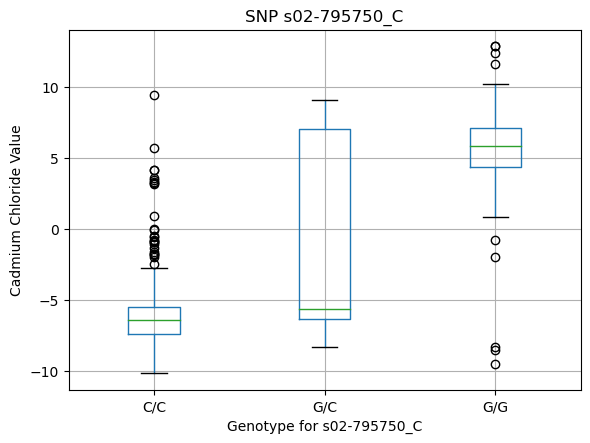

In [20]:
# box plot for top SNP to show phenotype stratified by genotype
plt.style.use('default')
snp_data.boxplot(column=['Cadmium_Chloride'], by=['Alleles'])
title_boxplot = 'SNP s02-795750_C'
plt.title(title_boxplot)
plt.suptitle('')
plt.ylabel('Cadmium Chloride Value')
plt.xlabel('Genotype for s02-795750_C')
plt.xticks([1,2,3],['C/C','G/C','G/G'])
plt.tight_layout
plt.show()

## Manhattan and QQ Plots for other phenotypes below
Saved as PDF, will upload separately to GitHub

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

chr_list = ["I", "II", "III", "IV", "V", "VI", "VII", "VIII",
           "IX", "23", "XI", "XII", "XIII", "XIV", "XV",
           "XVI", "26"]

path = 'plink_output/'

with PdfPages('output.pdf') as pdf:
    for file in sorted(os.listdir('/Users/cmdb/qbb2020-answers/lab3/plink_analysis/plink_output/')):
        if "assoc.linear" in file:

            output_filename = file.split('.')[1]

            gwas_data = pd.read_csv(file, sep = "\s+")
            gwas_data['logP'] = -1 * np.log10(gwas_data['P'])
            gwas_data['snp_index'] = range(len(gwas_data))

            sig_gwas = gwas_data.query('P < 10e-5')

            # sort 
            gwas_sorted = gwas_data.sort_values(by = "P")
            gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
            gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1)/len(gwas_sorted)
            gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])

            fig,ax = plt.subplots(nrows=2,figsize=(7,10))
            for i in chr_list:
                ax[0].scatter(gwas_data["snp_index"][gwas_data["CHR"]==i],
                          gwas_data["logP"][gwas_data["CHR"] == i])
                ax[0].scatter(sig_gwas["snp_index"][sig_gwas["CHR"]==i],
                          sig_gwas["logP"][sig_gwas["CHR"]==i], color = 'red')

            ax[0].set_xlabel("SNPs")
            ax[0].set_ylabel("-log10(p-value)")
            ax[0].set_title("GWAS"+' '+output_filename)

            ax[1].scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
            ax[1].plot([8,0],[8,0],color = "black")
            ax[1].set_xlim([0,8])
            ax[1].set_ylim([0,10])
            ax[1].set_xlabel("Expected -log10(p-value)")
            ax[1].set_ylabel("Observed -log10(p-value)")
            ax[1].set_title("QQ Plot"+' '+output_filename)

            pdf.savefig(fig)
            plt.clf()
    pdf.close()

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


AttributeError: 'NoneType' object has no attribute 'finalize'

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>

<Figure size 504x720 with 0 Axes>